# $\fbox{Appendix A}$ メモリの節約

## 1. 適切なデータ型の指定

In [1]:
from io import StringIO
import pandas as pd

testdata = StringIO("""col1,col2,col3
    1,4.4,99
    2,4.5,200
    3,4.7,65
    4,3.2,140
    """)

df = pd.read_csv(testdata)
df.dtypes

col1      int64
col2    float64
col3      int64
dtype: object

### 計算機ハードウェア内での数値の持ち方

In [2]:
format(0.1, '.32f')

'0.10000000000000000555111512312578'

In [3]:
format(0.3, '.32f')

'0.29999999999999998889776975374843'

In [4]:
0.1 + 0.1 + 0.1 == 0.3

False

In [5]:
round(0.1, 1) + round(0.1, 1) + round(0.1, 1) == round(0.3, 1)

False

In [6]:
round(0.1 + 0.1 + 0.1, 1) == round(0.3, 1)

True

### 整数型について

In [7]:
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

<IPython.core.display.Javascript object>


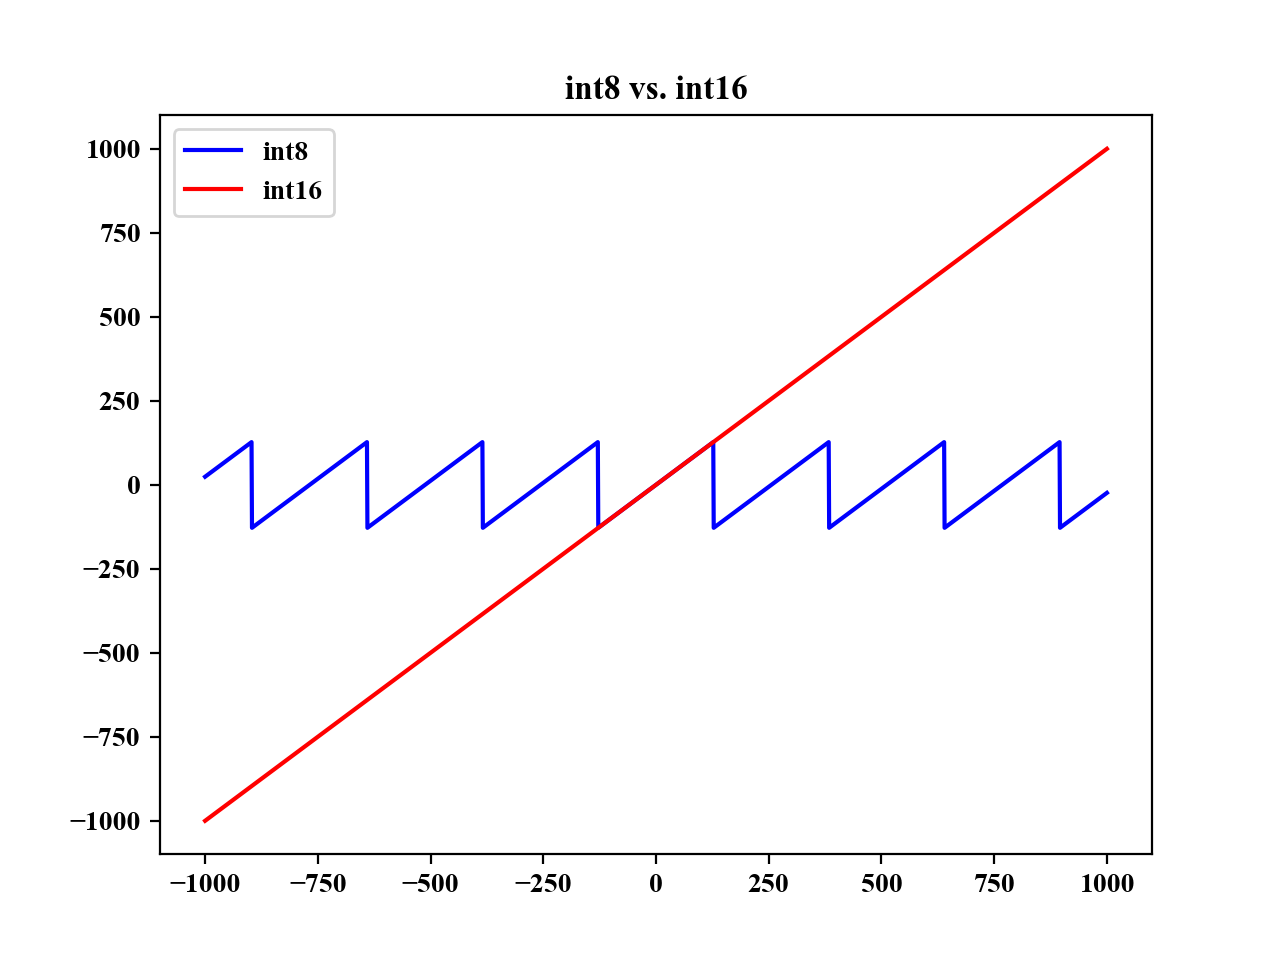

Text(0.5, 1.0, 'int8 vs. int16')

In [8]:
x = np.arange(-1000, 1001, dtype='int64')
df = pd.DataFrame(x.astype('int8'), index=x, columns=['int8'])
df['int16'] = x.astype('int16')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df.index, df.int8, label='int8', color='b')
ax.plot(df.index, df.int16, label='int16', color='r')
ax.legend()
ax.set_title('int8 vs. int16')

In [9]:
df.loc[2**7-2:2**7+1]

,int8,int16
126,126,126
127,127,127
128,-128,128
129,-127,129


### 浮動小数点型について

<IPython.core.display.Javascript object>


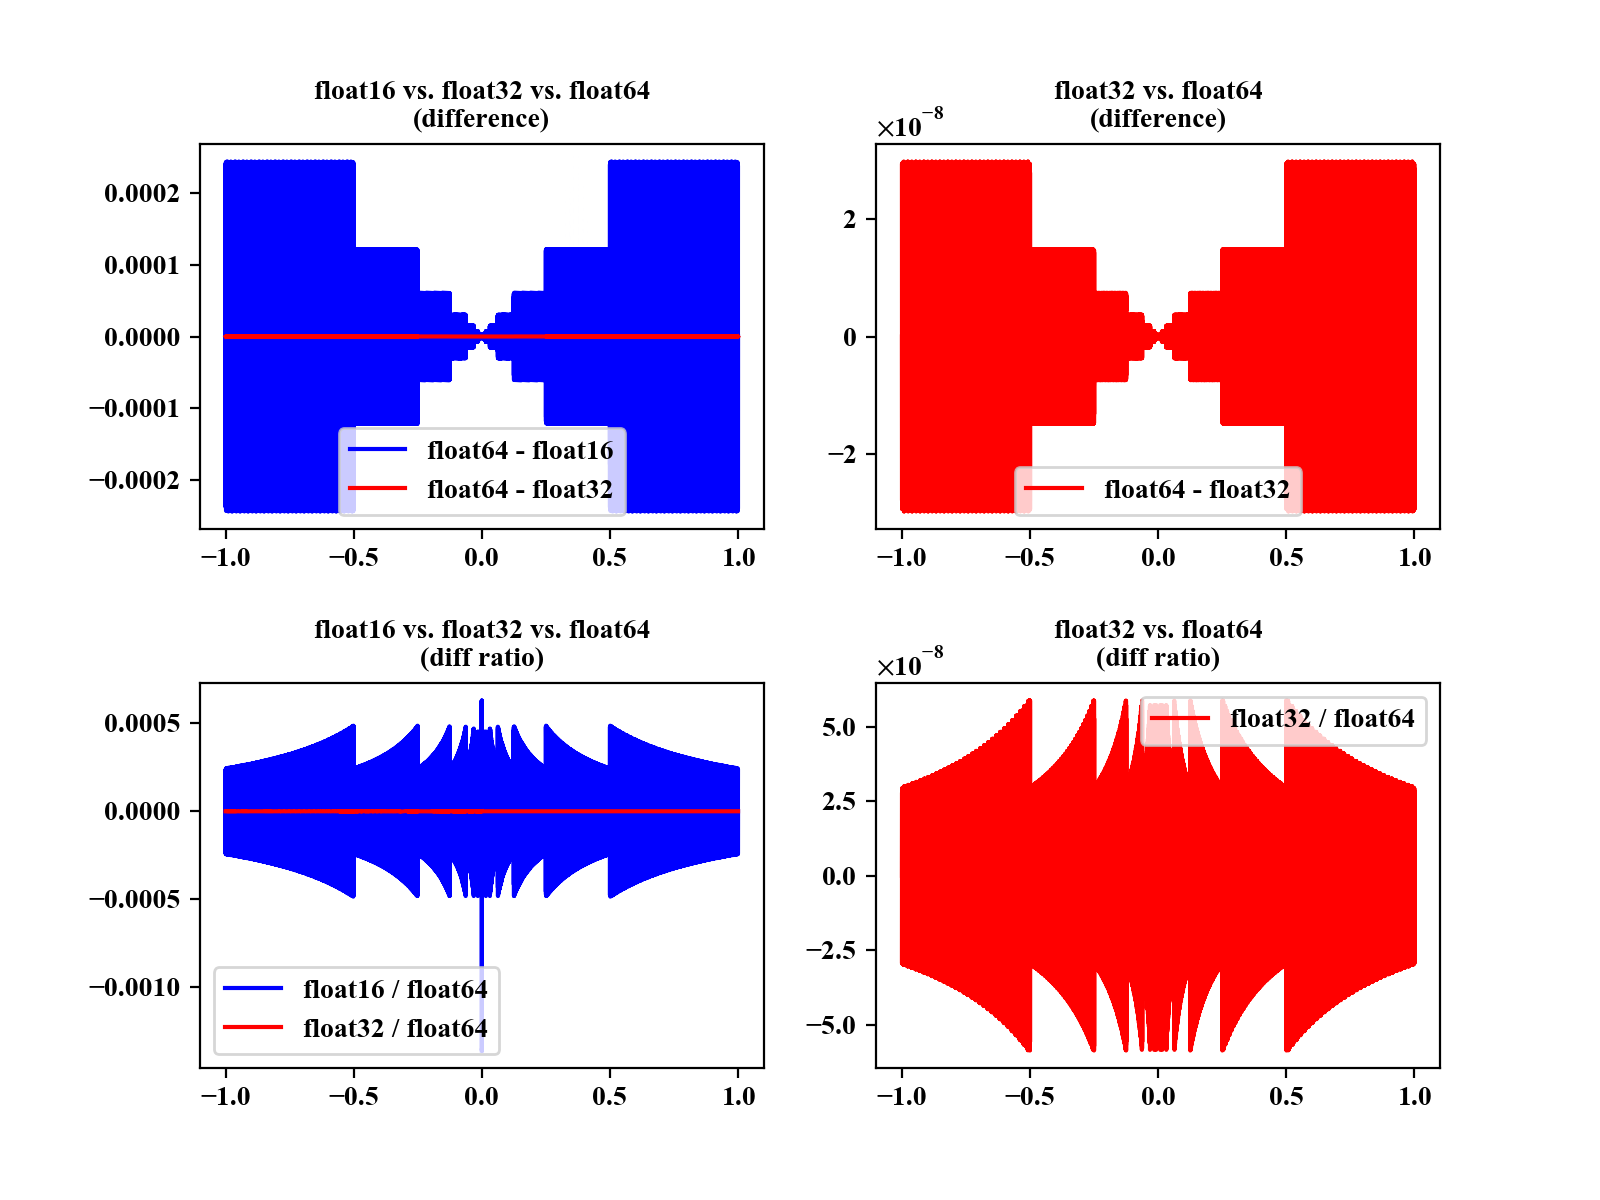

In [10]:
from matplotlib.ticker import ScalarFormatter

x = np.arange(-100000, 100001, dtype='float64') / 100000
df = pd.DataFrame(x.astype('float16'), index=x, columns=['float16'])
df['float32'] = x.astype('float32')
df['float64'] = x.astype('float64')

x = df.index
y16 = df.index - df.float16.astype('float64')
y32 = df.index - df.float32.astype('float64')

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(221)
ax1.plot(x, y16, label='float64 - float16', color='b')
ax1.plot(x, y32, label='float64 - float32', color='r')
ax1.tick_params(labelsize=10)
ax1.legend(fontsize=10)
ax1.set_title('float16 vs. float32 vs. float64\n(difference)', fontsize=10)

ax2 = fig.add_subplot(222)
ax2.plot(x, y32, label='float64 - float32', color='r')
ax2.tick_params(labelsize=10)
ax2.legend(fontsize=10)
ax2.set_title('float32 vs. float64\n(difference)', fontsize=10)
ax2.yaxis.set_major_formatter(ScalarFormatter(
    useMathText=True))  # 指数表示を10のべき乗表記に変更
ax2.yaxis.offsetText.set_fontsize(10)

ax3 = fig.add_subplot(223)
ax3.plot(x, y16/x, label='float16 / float64', color='b')
ax3.plot(x, y32/x, label='float32 / float64', color='r')
ax3.tick_params(labelsize=10)
ax3.legend(fontsize=10)
ax3.set_title('float16 vs. float32 vs. float64\n(diff ratio)', fontsize=10)

ax4 = fig.add_subplot(224)
ax4.plot(x, y32/x, label='float32 / float64', color='r')
ax4.tick_params(labelsize=10)
ax4.legend(fontsize=10)
ax4.set_title('float32 vs. float64\n(diff ratio)', fontsize=10)
ax4.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax4.yaxis.offsetText.set_fontsize(10)

fig.subplots_adjust(wspace=0.2, hspace=0.4)

## 2. 不要な変数の削除

### メモリの解放

In [11]:
test = ["1.0","2.0","3.0"] * 100
df = pd.DataFrame(test)
print (len(df))

300


In [12]:
del df
print (len(df))

NameError: name 'df' is not defined

### 入出力キャッシュの解放

In [13]:
a = 1

In [14]:
_i13

'a = 1'

In [15]:
_13

NameError: name '_13' is not defined

In [16]:
a

1

In [17]:
_16

1

In [18]:
del a

In [19]:
a

NameError: name 'a' is not defined

In [20]:
_i13

'a = 1'

In [21]:
_16

1

In [22]:
b = 2

In [23]:
b

2

In [24]:
%xdel b

In [25]:
b

NameError: name 'b' is not defined

In [26]:
_i22

'b = 2'

In [27]:
_23

NameError: name '_23' is not defined

### 3. ガベージコレクションを利用した明示的なメモリの解放

In [28]:
import gc
gc.collect()

2171